In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
import plotly.express as px
from sklearn.cluster import KMeans

In [140]:
df = pd.read_csv('Top Anime Dataset 2024.csv')

# Data Overview

In [141]:
df.head()

,Unnamed: 0,Score,Popularity,Rank,Members,Description,Synonyms,Japanese,English,Type,Episodes,Status,Aired,Premiered,Broadcast,Producers,Licensors,Studios,Source,Genres,Demographic,Duration,Rating
0,0,9.38,284,1,710,During their decade-long quest to defeat the D...,Frieren at the Funeral,葬送のフリーレン,Frieren: Beyond Journey's End,TV,28,Finished Airing,"Sep 29, 2023 to Mar 22, 2024",Fall 2023,Fridays at 23:00 (JST),"Aniplex, Dentsu, Shogakukan-Shueisha Productio...","None found, add some",Madhouse,Manga,"AdventureAdventure, DramaDrama, FantasyFantasy",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older
1,1,9.09,3,2,3,After a horrific alchemy experiment goes wrong...,"Hagane no Renkinjutsushi: Fullmetal Alchemist,...",鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist: Brotherhood,TV,64,Finished Airing,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,Sundays at 17:00 (JST),"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,Manga,"ActionAction, AdventureAdventure, DramaDrama, ...",ShounenShounen,24 min. per ep.,R - 17+ (violence & profanity)
2,2,9.07,13,3,2,Eccentric scientist Rintarou Okabe has a never...,NaN,STEINS;GATE,Steins;Gate,TV,24,Finished Airing,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,Wednesdays at 02:05 (JST),"Frontier Works, Media Factory, Kadokawa Shoten...",Funimation,White Fox,Visual novel,"DramaDrama, Sci-FiSci-Fi, SuspenseSuspense",NaN,24 min. per ep.,PG-13 - Teens 13 or older
3,3,9.06,342,4,630,"Gintoki, Shinpachi, and Kagura return as the f...",Gintama' (2015),銀魂°,Gintama Season 4,TV,51,Finished Airing,"Apr 8, 2015 to Mar 30, 2016",Spring 2015,Wednesdays at 18:00 (JST),"TV Tokyo, Aniplex, Dentsu","Funimation, Crunchyroll",Bandai Namco Pictures,Manga,"ActionAction, ComedyComedy, Sci-FiSci-Fi",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older
4,4,9.05,21,5,2,Seeking to restore humanity's diminishing hope...,NaN,進撃の巨人 Season3 Part.2,Attack on Titan Season 3 Part 2,TV,10,Finished Airing,"Apr 29, 2019 to Jul 1, 2019",Spring 2019,Mondays at 00:10 (JST),"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,Wit Studio,Manga,"ActionAction, DramaDrama, SuspenseSuspense",ShounenShounen,23 min. per ep.,R - 17+ (violence & profanity)


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1000 non-null   int64  
 1   Score        1000 non-null   float64
 2   Popularity   1000 non-null   int64  
 3   Rank         1000 non-null   int64  
 4   Members      1000 non-null   int64  
 5   Description  1000 non-null   object 
 6   Synonyms     709 non-null    object 
 7   Japanese     999 non-null    object 
 8   English      859 non-null    object 
 9   Type         1000 non-null   object 
 10  Episodes     1000 non-null   object 
 11  Status       1000 non-null   object 
 12  Aired        1000 non-null   object 
 13  Premiered    569 non-null    object 
 14  Broadcast    569 non-null    object 
 15  Producers    1000 non-null   object 
 16  Licensors    1000 non-null   object 
 17  Studios      1000 non-null   object 
 18  Source       1000 non-null   object 
 19  Genres 

In [143]:
df.isnull().sum()

Unnamed: 0       0
Score            0
Popularity       0
Rank             0
Members          0
Description      0
Synonyms       291
Japanese         1
English        141
Type             0
Episodes         0
Status           0
Aired            0
Premiered      431
Broadcast      431
Producers        0
Licensors        0
Studios          0
Source           0
Genres         229
Demographic    479
Duration         0
Rating           0
dtype: int64

# Data Cleaning and Transformation

In [144]:
# Replace non-numeric values with NaN, then fill NaN with 0, and convert to int
df['Episodes'] = pd.to_numeric(df['Episodes'], errors='coerce').fillna(0).astype(int)

In [145]:
# Define a function to split 'Aired' into 'Start_Date' and 'End_Date'
def split_aired_dates(aired):
    if ' to ' in aired:
        start_date, end_date = aired.split(' to ')
        if end_date == '?':
            end_date = np.nan
    else:
        start_date, end_date = aired, np.nan
    return pd.Series([start_date, end_date])

# Apply the function and create 'Start_Date' and 'End_Date' columns
df[['Start_Date', 'End_Date']] = df['Aired'].apply(split_aired_dates)

# Replace 'Unknown' with 'NA'
df = df.replace('Unknown', 'NA')

# Convert 'Start_Date' and 'End_Date' to datetime and format to month/day/year
df['Start_Date'] = pd.to_datetime(df['Start_Date'], errors='coerce').dt.strftime('%m/%d/%Y')
df['End_Date'] = pd.to_datetime(df['End_Date'], errors='coerce').dt.strftime('%m/%d/%Y')

In [146]:
# Define a function to split 'Premiered' into 'Premiered_Year' and 'Premiered_Season'
def split_premiered(premiered):
    try:
        if isinstance(premiered, str) and premiered.strip():  # Check if 'Premiered' is a non-empty string
            season, year = premiered.split(' ')
            return pd.Series([year, season])
        else:
            return pd.Series(['NA', 'NA'])
    except ValueError:
        return pd.Series(['NA', 'NA'])

# Apply the function and create 'Premiered_Year' and 'Premiered_Season' columns
df[['Premiered_Year', 'Premiered_Season']] = df['Premiered'].apply(split_premiered)

# Convert 'Premiered_Year' to datetime and format it to just the year
df['Premiered_Year'] = pd.to_datetime(df['Premiered_Year'], format='%Y', errors='coerce').dt.strftime('%Y')

In [147]:
# Function to split Broadcast into Broadcast_Day and Broadcast_Time (JST)
def split_broadcast(broadcast):
    if pd.isna(broadcast):  # Check for NaN values
        return pd.Series(['NA', 'NA'])
    elif ' at ' in broadcast:
        day, time = broadcast.split(' at ')
        if ' (JST)' in time:
            time = time.replace(' (JST)', '')
        return pd.Series([day, time])
    elif 'Unknown' in broadcast:
        return pd.Series(['NA', 'NA'])
    else:
        return pd.Series(['NA', 'NA'])

# Apply the function and create 'Broadcast_Day' and 'Broadcast_Time (JST)' columns
df[['Broadcast_Day', 'Broadcast_Time (JST)']] = df['Broadcast'].apply(split_broadcast)

# Convert 'Broadcast_Time (JST)' to time type
df['Broadcast_Time (JST)'] = pd.to_datetime(df['Broadcast_Time (JST)'], format='%H:%M', errors='coerce').dt.time

In [148]:
# Function to convert duration to minutes
def convert_to_minutes(duration):
    hours = 0
    minutes = 0
    if 'hr.' in duration:
        hours_match = re.search(r'(\d+)\s*hr.', duration)
        if hours_match:
            hours = int(hours_match.group(1))
    if 'min.' in duration:
        minutes_match = re.search(r'(\d+)\s*min.', duration)
        if minutes_match:
            minutes = int(minutes_match.group(1))
    return hours * 60 + minutes

# Function to create Series_Duration and Movie_Duration columns
def split_duration(duration):
    if 'per ep.' in duration:
        series_duration = convert_to_minutes(duration)
        movie_duration = np.nan
    else:
        series_duration = np.nan
        movie_duration = convert_to_minutes(duration)
    return pd.Series([series_duration, movie_duration])

# Apply the function and create 'Series_Duration' and 'Movie_Duration' columns
df[['Series_Duration', 'Movie_Duration']] = df['Duration'].apply(split_duration)

# Convert the new columns to appropriate data types
df['Series_Duration'] = df['Series_Duration'].astype('Int64') 
df['Movie_Duration'] = df['Movie_Duration'].astype('Int64')

In [149]:
# Fill Missing Values
columns_to_fill_NA = ['Synonyms', 'Japanese', 'English', 'Premiered', 'Broadcast', 'Genres', 'Demographic']
df[columns_to_fill_NA] = df[columns_to_fill_NA].fillna('NA')

columns_to_fill_z = ['Premiered_Year', 'Premiered_Season', 'Episodes', 'Start_Date', 'End_Date', 
                     'Broadcast_Day', 'Broadcast_Time (JST)','Series_Duration','Movie_Duration']
df[columns_to_fill_z] = df[columns_to_fill_z].fillna(0)

In [150]:
# df.to_csv('cleaned_data.csv')

# Data Visualization

In [151]:
# Set the style for seaborn
sns.set(style="whitegrid")

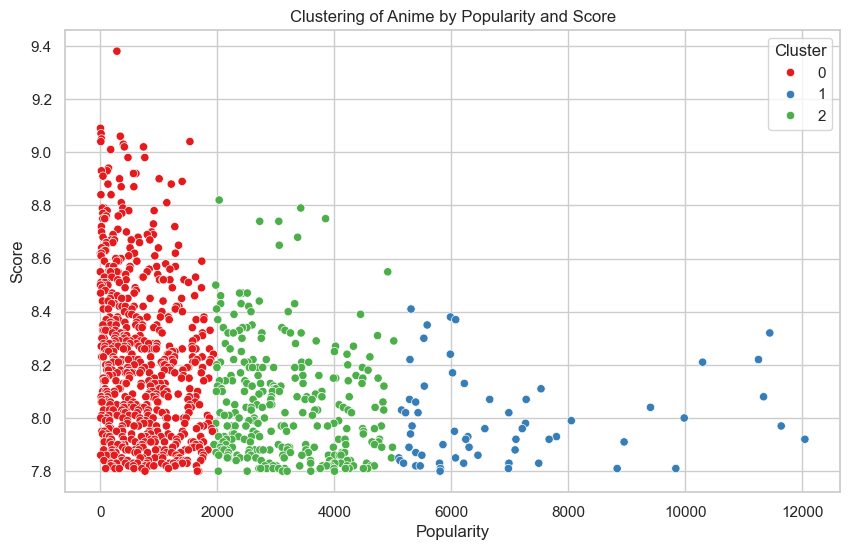

In [152]:
# Clustering of Anime by Popularity and Score
X = df[['Popularity', 'Score']]
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
df['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Popularity', y='Score', hue='Cluster', data=df, palette='Set1', legend='full')
plt.title('Clustering of Anime by Popularity and Score')
plt.xlabel('Popularity')
plt.ylabel('Score')
plt.show()

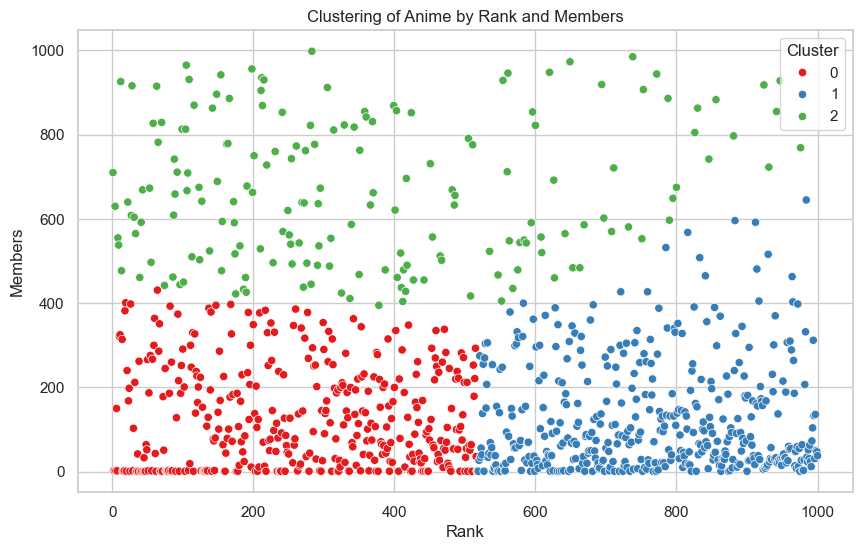

In [153]:
# Clustering of Anime by Rank and Members
X = df[['Rank', 'Members']]
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
df['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rank', y='Members', hue='Cluster', data=df, palette='Set1', legend='full')
plt.title('Clustering of Anime by Rank and Members')
plt.xlabel('Rank')
plt.ylabel('Members')
plt.show()

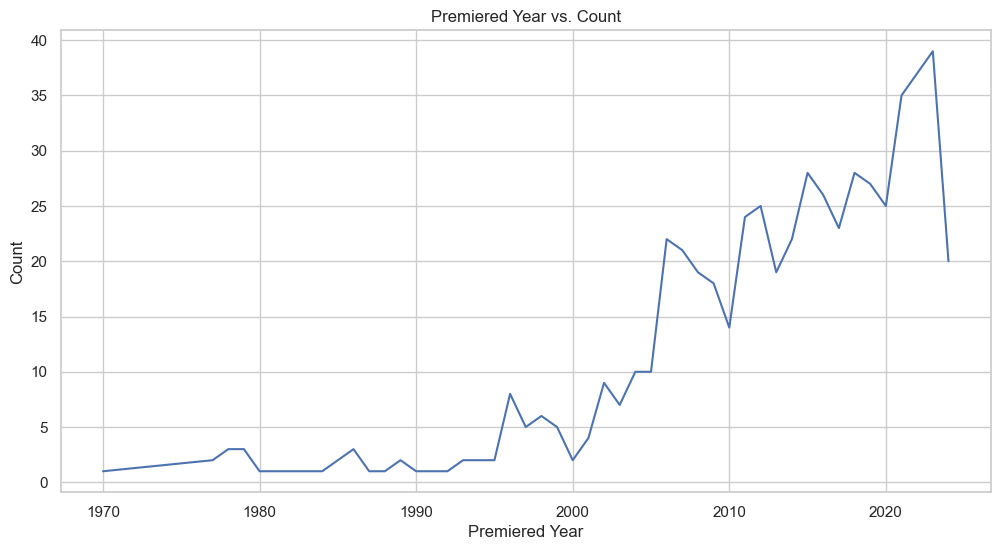

In [154]:
# Premiered Year vs. Count
df['Premiered_Year'] = pd.to_datetime(df['Premiered_Year'], format='%Y', errors='coerce').dt.year
premiered_year_count = df['Premiered_Year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=premiered_year_count.index, y=premiered_year_count.values)
plt.title('Premiered Year vs. Count')
plt.xlabel('Premiered Year')
plt.ylabel('Count')
plt.show()

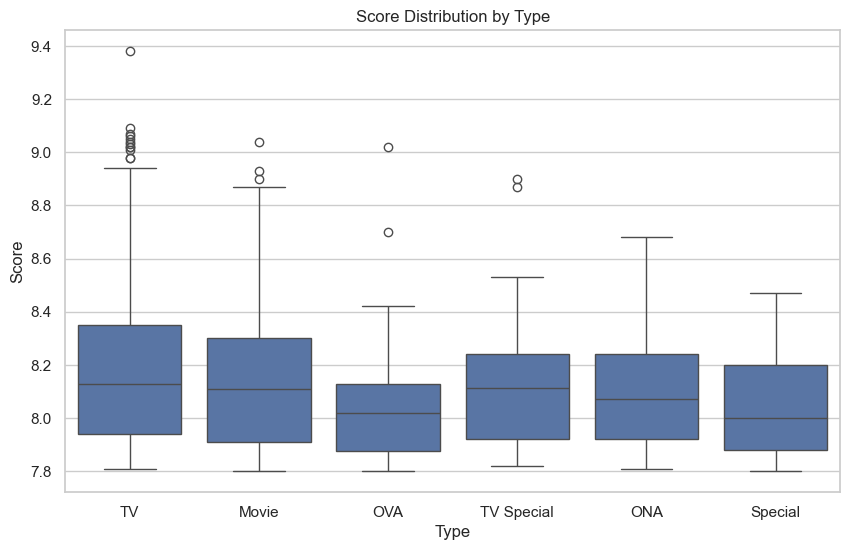

In [155]:
# Score Distribution by Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Score', data=df)
plt.title('Score Distribution by Type')
plt.xlabel('Type')
plt.ylabel('Score')
plt.show()

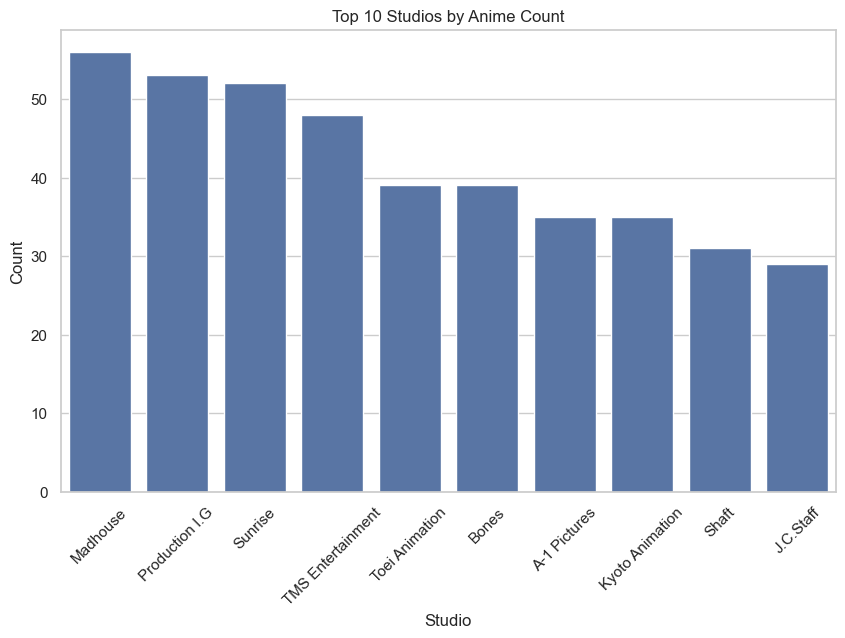

In [156]:
# Top 10 Studios by Anime Count
studio_counts = df['Studios'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=studio_counts.index, y=studio_counts.values)
plt.title('Top 10 Studios by Anime Count')
plt.xlabel('Studio')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

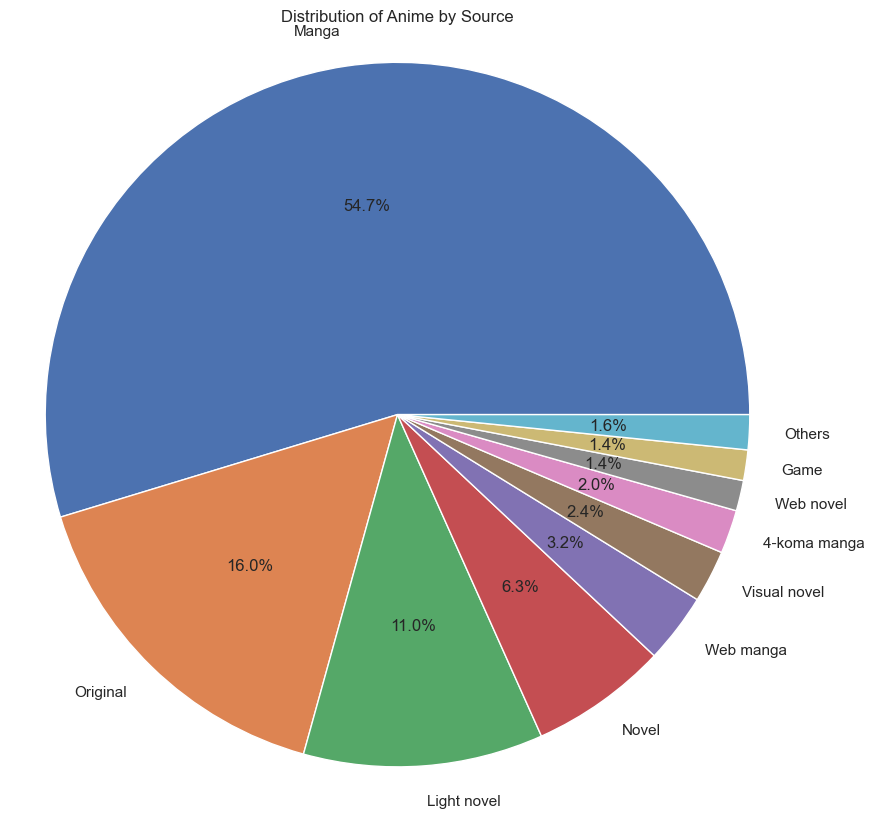

In [157]:
# Distribution of Anime by Source
source_counts = df['Source'].value_counts(normalize=True)
others = source_counts[source_counts < 0.01].sum()
source_counts = source_counts[source_counts >= 0.01]
source_counts = pd.concat([source_counts, pd.Series({'Others': others})])

plt.figure(figsize=(10, 10))
plt.pie(source_counts, labels=source_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Anime by Source')
plt.axis('equal')
plt.show()

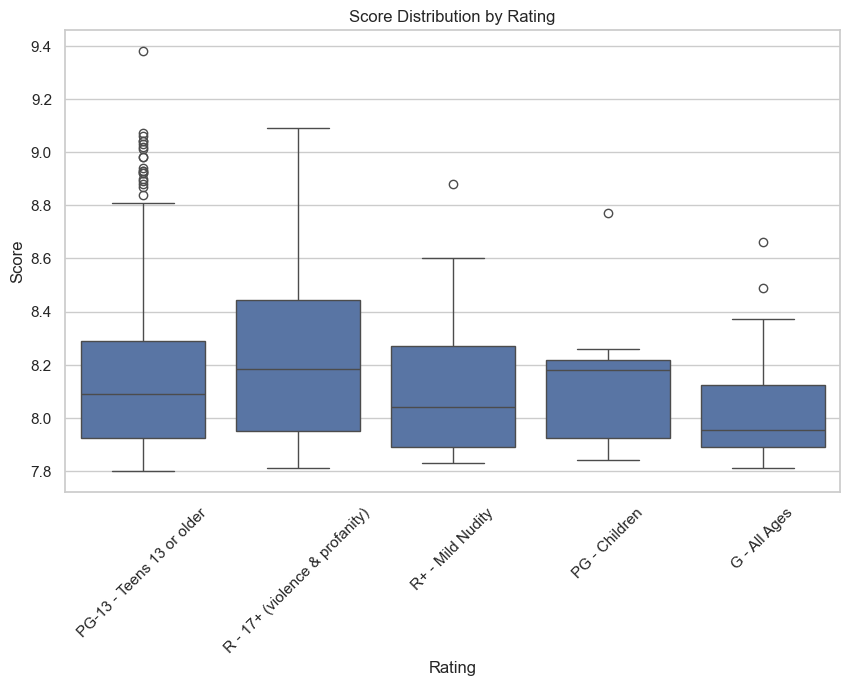

In [158]:
# Score Distribution by Rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rating', y='Score', data=df)
plt.title('Score Distribution by Rating')
plt.xlabel('Rating')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()